## Classification dengan KNN (K Nearest Neighbours)
KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.

Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

In [2]:
import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 
        'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


## Visualisasi Data

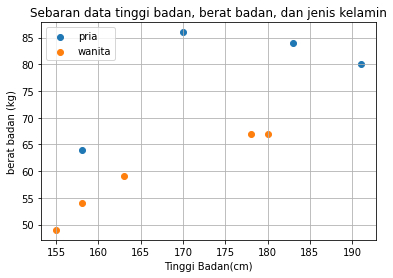

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby ('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)
    
plt.legend(loc='upper left')
plt.title('Sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('Tinggi Badan(cm)')
plt.ylabel('berat badan (kg)')
plt.grid(True)
plt.show()

# Classification dengan KNN
## Preprocessing Dataset

In [4]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train: {X_train}')
print(f'y_train: {y_train}')

X_train: [[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]
y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [5]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train: {y_train}')

y_train: [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [6]:
# transformasi array yang tadinya 2dimensi menjadi 1 dimensi
y_train = y_train.flatten()
print (f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


## Training KNN Classification Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#Nilai parameter K digunakan untuk jumlah tetangga terdekat yang dilibatkan
#untuk prosess prediksi
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

## Prediksi Jenis Kelamin

In [8]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array ([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [9]:
y_new = model.predict(X_new)
y_new

array([1])

In [10]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

## Visualisasi Nearest Neighbours

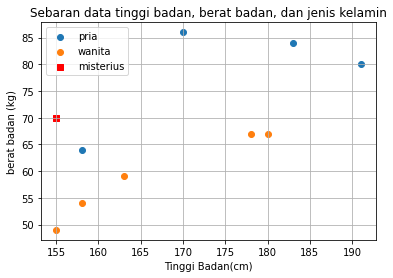

In [11]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby ('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('Tinggi Badan(cm)')
plt.ylabel('berat badan (kg)')
plt.grid(True)
plt.show()

## Kalkulasi distance (Euclidean Distance)

In [18]:
misterius = np.array([155, 70])
misterius

array([155,  70])

In [16]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [19]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [20]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


## Evaluasi KNN Classification Model

In [23]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test: {X_test}')
print(f'y_test: {y_test}')

X_test: [[168  65]
 [180  96]
 [160  52]
 [169  67]]
y_test: [0 0 1 1]


In [22]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

tujuan evaluasi yaitu untuk membandingkan nilai dari y_test dengan y_pred

## Accuracy

In [24]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


## Precission

In [25]:
from sklearn.metrics import precision_score

prec = precision_score (y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.6666666666666666


## Recall

In [26]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


## F1 Score

In [27]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.8


## Classification Report

In [29]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report: {cls_report}')

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## Matthews Correlation Coefficient (MCC)
MCC merupakan alternatif dari F1 score untuk pengukuran performa binary classifiers

nilai sempurna dari MCC yaitu 1

Kalau prediksi dilakukan secara random/acak maka nilainya akan 0, jika classifiers nya sangat ngaco maka scorenya akan menjadi -1

In [30]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
